## Observations and Insights 

In [1]:
#The following observations and insights are obtained from the drug regimen study

    # The drug regimens Capomulin and Ramicane, 230 and 228 respectively and Propriva had the least with 156.
    # Sex distribution was evenly split for the most part with only 28 more male than females (49.3%female/50.7%male)
    # The four drug regimens that were analyzed (Capomulin, Ramicane, Infubinol, Ceftamin) show a consistent distribution with only one outlier in the Infubinol drug regime. Additionally the Capomulin and Ramicane regimes show the small tumor volume at the end of the time point, potentially indicating better effectiveness.
    # Tumor volume tend to be bigger for larger mice. There is good linear relationship between mouse weight and tumor volume for the drug regime Capomulin with an correlation coefficient (r) of 0.95.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
#%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge our two data frames together
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
combined_mouse_data["Mouse ID"].unique() # This displayed all 249 Mouse IDs
combined_mouse_data["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_data.loc[combined_mouse_data.duplicated(subset =["Mouse ID", "Timepoint"],keep=False)==True,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = combined_mouse_data.loc[combined_mouse_data.duplicated(subset =["Mouse ID", "Timepoint"],keep=False)==True,:]
dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_combined_mouse_data = combined_mouse_data.drop_duplicates(subset =["Mouse ID", "Timepoint"])
Clean_combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
Clean_combined_mouse_data["Mouse ID"].nunique()


249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_data = Clean_combined_mouse_data.groupby(["Drug Regimen"])
volume = summary_data["Tumor Volume (mm3)"]
mouse_vol_sem = volume.sem()
mouse_vol_std = volume.std()
mouse_vol_var = volume.var()
mouse_vol_mean = volume.mean()
mouse_vol_median = volume.median()
summary_stat_df = pd.DataFrame({"Tumor Vol Mean":mouse_vol_mean, 
                                "Tumor Vol Median":mouse_vol_median,
                                "Tumor Vol Variance":mouse_vol_var,
                                "Tumor Vol Standard Dev.": mouse_vol_std,
                                "Tumor Vol SEM": mouse_vol_sem
                               })
summary_stat_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Standard Dev.,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = volume.agg(["mean", "median","var","std", "sem"])
summary_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

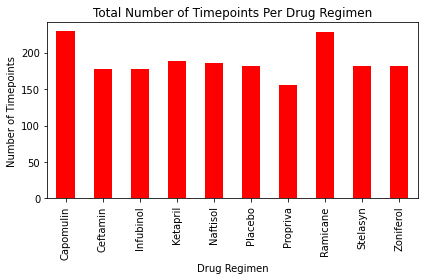

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_plot = summary_data["Timepoint"].count()
bar_plot = timepoints_plot.plot(kind = "bar", ylabel = "Number of Timepoints", color = 'r', title = "Total Number of Timepoints Per Drug Regimen")
bar_plot
plt.tight_layout()
timepoints_plot

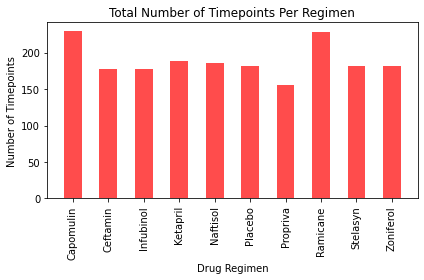

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_plot_pyplot = summary_data["Timepoint"].count()
x_axis = np.arange(len(timepoints_plot_pyplot))
plt.bar(x_axis,timepoints_plot_pyplot,color='r', alpha=0.7, width = 0.5, align="center" )

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints_plot_pyplot.index, rotation=90)

plt.title("Total Number of Timepoints Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.tight_layout()
plt.show()

In [12]:
pie = Clean_combined_mouse_data.groupby("Sex")
pie_count= pie["Sex"].count()
pie_count

Sex
Female    930
Male      958
Name: Sex, dtype: int64

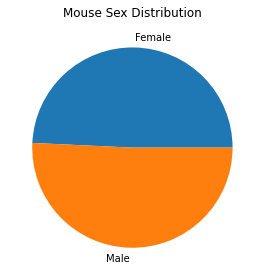

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot = pie_count.plot(kind = "pie", title = "Mouse Sex Distribution", ylabel="")
pie_plot
plt.tight_layout()

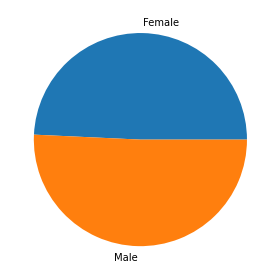

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_count, labels=pie_count.index)
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_data = Clean_combined_mouse_data.groupby(["Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse

tumor_df = pd.DataFrame(tumor_data["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_merge = pd.merge(tumor_df, Clean_combined_mouse_data, on=["Mouse ID","Timepoint"],how="left")


In [27]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_ls = []
Ramicane_ls = []
Infubinol_ls = []
Ceftamin_ls = []

drugs = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

Capomulin_tm = tumor_merge["Tumor Volume (mm3)"].loc[tumor_merge["Drug Regimen"]=="Capomulin"].reset_index(drop=True)
Ramicane_tm = tumor_merge["Tumor Volume (mm3)"].loc[tumor_merge["Drug Regimen"]=="Ramicane"].reset_index(drop=True)
Infubinol_tm = tumor_merge["Tumor Volume (mm3)"].loc[tumor_merge["Drug Regimen"]=="Infubinol"].reset_index(drop=True)
Ceftamin_tm = tumor_merge["Tumor Volume (mm3)"].loc[tumor_merge["Drug Regimen"]=="Ceftamin"].reset_index(drop=True)

tumor_df = pd.DataFrame({drugs[0]: Capomulin_tm, drugs[1]: Ramicane_tm, 
                         drugs[2]:Infubinol_tm, drugs[3]:Ceftamin_tm})
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

quartiles_ls = []
lowerq_ls = []
upperq_ls = []
iqr_ls = []
upper_range_ls = []
lower_range_ls = []

for i in drugs:
    quartiles = tumor_df[i].quantile([.25,.5,.75])
    quartiles_ls.append(quartiles)
    lowerq = quartiles[0.25]
    lowerq_ls.append(lowerq)
    upperq = quartiles[0.75]
    upperq_ls.append(upperq)
    iqr = upperq -lowerq
    iqr_ls.append(iqr )
    upper_range = upperq+(1.5*iqr)
    upper_range_ls.append(upper_range)
    lower_range = lowerq-(1.5*iqr)
    lower_range_ls.append(lower_range)

# Determine outliers using upper and lower bounds
# Creating a list of of outliers, indexes of the list correspond to the 4 drug regimen in the 'drugs' list.
outlier_list=[]
for i in range(0,4):
    outlier_tumor = tumor_df.loc[(tumor_df[drugs[i]] < lower_range_ls[i]) | (tumor_df[drugs[i]] > upper_range_ls[i])]
    outlier_list.append(outlier_tumor[drugs[i]])

print(upper_range_ls)
print(lower_range_ls)
print (outlier_list)
# only value was identified as an outlier in the 
    

[51.83201549, 54.30681135, 82.74144559000001, 87.66645829999999]
[20.70456164999999, 17.912664470000003, 36.83290494999999, 25.355449580000002]
[Series([], Name: Capomulin, dtype: float64), Series([], Name: Ramicane, dtype: float64), 5    36.321346
Name: Infubinol, dtype: float64, Series([], Name: Ceftamin, dtype: float64)]


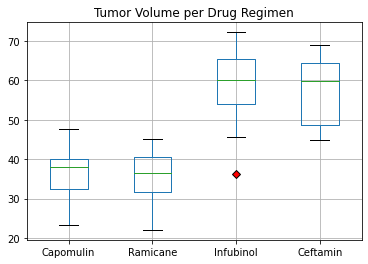

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
marker = dict(markerfacecolor='r', marker='D')
fig5, tumor_box = plt.subplots()
tumor_box.set_title('Tumor Volume per Drug Regimen')
tumor_box = tumor_df.boxplot(column=drugs, flierprops=marker)
plt.show()


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capo_mouse = Clean_combined_mouse_data.loc[Clean_combined_mouse_data["Drug Regimen"] == "Capomulin"]
sel_mouse = "i557"
#Select Mouse i557
Ms_i557 = Capo_mouse[["Timepoint","Tumor Volume (mm3)"]].loc[Capo_mouse["Mouse ID"] == sel_mouse]
Ms_i557


,Timepoint,Tumor Volume (mm3)
431,0,45.000000
432,5,42.261665
433,10,42.992077
434,15,43.529876
435,20,43.967895
436,25,44.596219
437,30,45.261384
438,35,45.941949
439,40,46.821070
440,45,47.685963


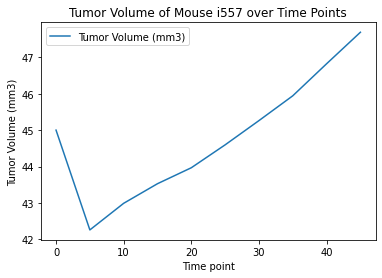

<Figure size 432x288 with 0 Axes>

In [19]:
Ms_i557.set_index('Timepoint', inplace=True)
mouse_line = Ms_i557.plot(kind='line')

mouse_line.set_xlabel("Time point")
mouse_line.set_ylabel("Tumor Volume (mm3)")
mouse_line.set_title("Tumor Volume of Mouse i557 over Time Points")

plt.show()
plt.tight_layout()

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_x = Capo_mouse.groupby("Weight (g)")
scatter_capo = scatter_x[["Tumor Volume (mm3)"]].mean().reset_index()
weight = scatter_capo["Weight (g)"]
volume = scatter_capo["Tumor Volume (mm3)"]
scatter_capo.head()
                      




,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700


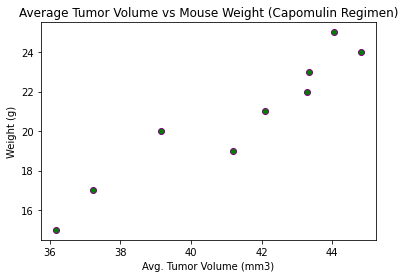

In [21]:
plt.scatter(volume,weight, marker="o",
            facecolors="green", edgecolors="purple")
plt.xlabel("Avg. Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Average Tumor Volume vs Mouse Weight (Capomulin Regimen)")
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
#We = we_slope * TumVol + we_int
(we_slope, we_int, we_r, we_p, we_std_err) = linregress(volume, weight)
fit_we = we_slope*volume + we_int
print(fit_we)
print(we_r)
print(we_std_err)
print(we_p)
# for mouse weight and average tumor volume for the Capomulin regimen


0    15.543036
1    16.585192
2    20.592141
3    18.530900
4    21.507286
5    22.718774
6    22.771848
7    24.250888
8    23.499936
Name: Tumor Volume (mm3), dtype: float64
0.9505243961855268
0.12473054259542474
8.44945104064636e-05


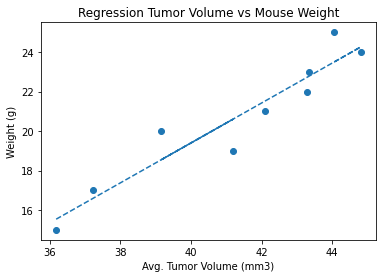

In [23]:

plt.scatter(volume, weight)
plt.plot(volume, fit_we,"--")

plt.xlabel("Avg. Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Regression Tumor Volume vs Mouse Weight")
plt.show()
